# Seattle AirBnB Listings Analysis - Write-a-Data-Science-Blog-Post


This notebook is a part of Udaicty data scientist nanodegrees program, that aim to creat a blog post exploring and analyze a data set and effectively communicate technical results of the Analysis.


The CRISP-DM methodology will be applied in the analysis process of this project.

## 1. Business understanding
For this project, I was interestested in using Seattle AirBnB dataset from Kaggle.
In this notebook I will focus on answring the three question below from the dataset:

1. What is the best time to visit Seattle (peak seasons, listings prices)?
2. What are the number of Airbnb listings in Seattle neighborhoods and the listings rate price?
3. Which Airbnb Seattle listings properties have the greatest impact on their prices?


## 2. Data Understanding
Here we will take a look and examine the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from datetime import datetime

# Set base color for plots
base_color = sb.color_palette()[9]
base_color_2 = sb.color_palette()[0]

In [2]:
# load calender data set and display head
df_calendar = pd.read_csv('./calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
# shape of calendar data set
"calendar dataframe: Number of rows: "+str(df_calendar.shape[0]) +", Number of colunms: "+ str(df_calendar.shape[1])

'calendar dataframe: Number of rows: 1393570, Number of colunms: 4'

In [4]:
#get data set info : columns, number of valuesm and data types
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [5]:
# check the columns in the calendar dataset
df_calendar.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

* Calendar dataset includes the listing id and the price and availability for a single date

In [6]:
# load listings data set and display head
df_listings = pd.read_csv('./listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [7]:
# shape of listings data set
"listings dataframe: Number of rows: "+str(df_listings.shape[0]) +", Number of colunms: "+ str(df_listings.shape[1])

'listings dataframe: Number of rows: 3818, Number of colunms: 92'

In [8]:
#get data set info : columns, number of valuesm and data types
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [9]:
# check the columns in the listings dataset
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

* Listings dataset includes information about an AirBnB listing in Seattle , and their onwers and the different prices and fees associated with it.

### 1. What is the best time to visit Seattle (peak seasons, listings prices)?

To answer this question were are going to use the calendar data set.

In [14]:
# getting the columns names and numbers of calender data set
df_calendar.columns, len(df_calendar.columns)

(Index(['listing_id', 'date', 'available', 'price'], dtype='object'), 4)

In [15]:
#get data set info : columns, number of valuesm and data types
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


#### 3. Data preparation
Before using the dataset to answer the first question, their are some data preparation steps that are needed to be done.

- As you can see from the cell above that we will clean the price column values by converting its values from string to float.

In [16]:
# Clean the price column that has values with "$" and "," 
df_calendar["price"] = df_calendar.apply(lambda x: float(x['price'].replace('$', '').replace(',', '')) if( pd.notna(x['price'])) else x['price'] ,axis=1)
df_calendar.head()


,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


- Also we will need to extract month week_day columns  from the date in order to calculate the listing average price in on a month and day of the week bases 

In [17]:
# add month column extracted from date column
df_calendar["month"] = pd.DatetimeIndex(df_calendar['date']).month
df_calendar.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,t,85.0,1
1,241032,2016-01-05,t,85.0,1
2,241032,2016-01-06,f,NaN,1
3,241032,2016-01-07,f,NaN,1
4,241032,2016-01-08,f,NaN,1


In [18]:
# add week_day column extracted from date column
df_calendar['week_day'] = pd.DatetimeIndex(df_calendar['date']).day_name()

df_calendar.head()

,listing_id,date,available,price,month,week_day
0,241032,2016-01-04,t,85.0,1,Monday
1,241032,2016-01-05,t,85.0,1,Tuesday
2,241032,2016-01-06,f,NaN,1,Wednesday
3,241032,2016-01-07,f,NaN,1,Thursday
4,241032,2016-01-08,f,NaN,1,Friday


In [19]:
# get only avalibale listings to do the analysis on
df_calendar_available =  df_calendar[df_calendar.available == 't']
df_calendar_available.head()

,listing_id,date,available,price,month,week_day
0,241032,2016-01-04,t,85.0,1,Monday
1,241032,2016-01-05,t,85.0,1,Tuesday
9,241032,2016-01-13,t,85.0,1,Wednesday
10,241032,2016-01-14,t,85.0,1,Thursday
14,241032,2016-01-18,t,85.0,1,Monday


In [20]:
#get data set info : columns, number of valuesm and data types
df_calendar_available.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 6 columns):
listing_id    934542 non-null int64
date          934542 non-null object
available     934542 non-null object
price         934542 non-null float64
month         934542 non-null int64
week_day      934542 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 49.9+ MB


#### 3. Data Modeling (Analysis)

Here we try to answer our question from the prepared data:

1. What is the best time to visit seattle (peak seasons, listings prices)?

First, we will take a look at the distrbution of Seattle AirBnB listings prices' averge over the days of the week:

In [21]:
# getting average of available AirBnB liating on day of the week bases
listing_price_by_week_day = df_calendar_available.groupby('week_day').price.mean()
listing_price_by_week_day

week_day
Friday       143.036294
Monday       135.676414
Saturday     143.202136
Sunday       136.459941
Thursday     136.476032
Tuesday      135.408764
Wednesday    135.447880
Name: price, dtype: float64

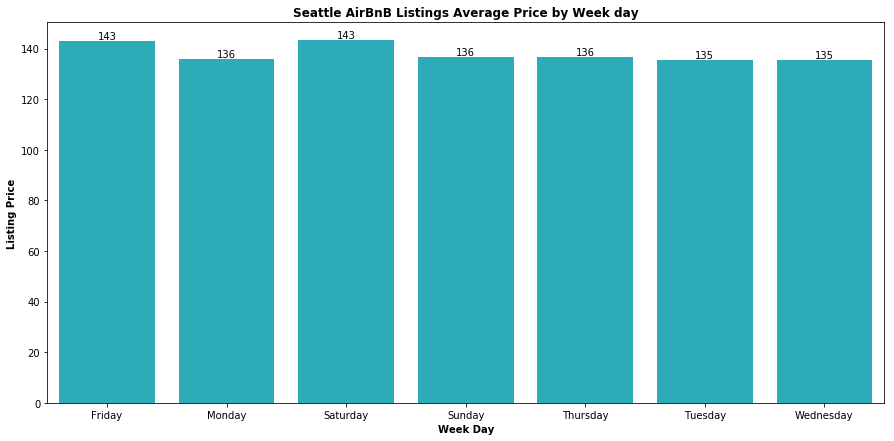

In [22]:
#set the figure size
plt.figure(figsize=(15,7))

# plot the barplot of listing_price_by_week_day means
plot = sb.barplot(x = listing_price_by_week_day.index, y =listing_price_by_week_day, color = base_color);

#set title and labels of plot
plt.xlabel('Week Day', fontweight='bold')
plt.ylabel('Listing Price', fontweight='bold')
plt.title('Seattle AirBnB Listings Average Prices by Week day', fontweight='bold' )

#set bar values in plot
for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black');

Then, we will take a look at the distribution of Seattle AirBnB listings prices averge over the months:

In [23]:
listing_price_by_month = df_calendar_available.groupby('month').price.mean()
listing_price_by_month

month
1     122.912176
2     124.293927
3     128.644488
4     135.097005
5     139.538183
6     147.473137
7     152.094150
8     150.656594
9     143.255949
10    137.031939
11    135.688738
12    137.251835
Name: price, dtype: float64

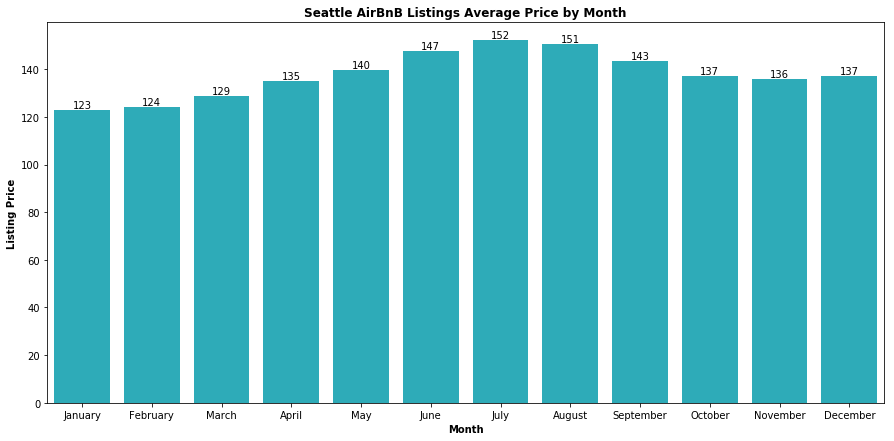

In [24]:
#set the figure size
plt.figure(figsize=(15,7))

# set axes like labels vlaues thet will be used in plots
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


# plot the barplot of listing_price_by_month means
plot = sb.barplot(x = listing_price_by_month.index, y =listing_price_by_month, color = base_color);

#set xticklabels, title and labels of plot
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Listing Price', fontweight='bold')
plt.title('Seattle AirBnB Listings Average Prices by Month', fontweight='bold')
plot.set_xticklabels(months);

#set bar values in plot
for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black');

After that, we will take a look at the distribution of Seattle AirBnB listings counts over the months :

In [25]:
booked_listings_counts_by_month = df_calendar_available.groupby('month').listing_id.count()
booked_listings_counts_by_month

month
1     64937
2     73321
3     83938
4     76037
5     79971
6     77244
7     74222
8     76347
9     77246
10    82438
11    81780
12    87061
Name: listing_id, dtype: int64

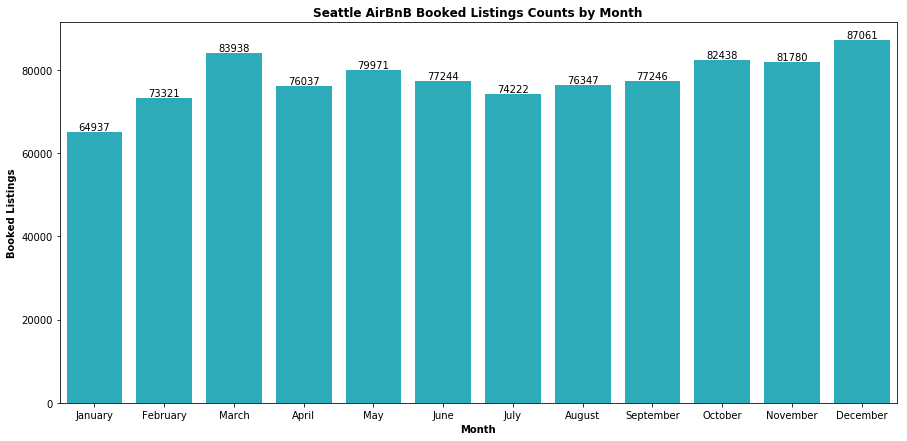

In [26]:
#set the figure size
plt.figure(figsize=(15,7))

# plot the barplot of booked_listings_counts_by_month counts
plot = sb.barplot(x = booked_listings_counts_by_month.index, y =booked_listings_counts_by_month, color = base_color);

#set xticklabels, title and labels of plot
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Booked Listings', fontweight='bold') 
plt.title('Seattle AirBnB Booked Listings Counts by Month', fontweight='bold')
plot.set_xticklabels(months)

#set bar values in plot
for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black');

#### 5. Results

From the above you can see that:

- The prices of AirBnB listings in seatlle tend to incease over the weekends (Friday and Saterday nights).


- The prices of AirBnB listings in seatlle seem to increase from the beginning of Summner (June) until the early Autumn (September) peaking at July. Also the seem to the prices seem to be at their lowest towards the beginning of the year January through March the will be a good option if you are looking to travel on a budget.


- The number of listings availabilty seem to icrease four months of the year March October through December and peaking at December that means the you will have options to choose a listing will increase. The number of listings availabilty seem be at its lowest on January. 


### 2. What are the number of Airbnb listings in Seattle neighborhoods and the listings rate price?

To answer this question were are going to use the listings data set.



In [27]:
# getting the columns names and numbers of listings data set
df_listings.columns, len(df_listings.columns)

(Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
        'space', 'description', 'experiences_offered', 'neighborhood_overview',
        'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
        'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
        'host_location', 'host_about', 'host_response_time',
        'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
        'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
        'host_listings_count', 'host_total_listings_count',
        'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
        'street', 'neighbourhood', 'neighbourhood_cleansed',
        'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
        'smart_location', 'country_code', 'country', 'latitude', 'longitude',
        'is_location_exact', 'property_type', 'room_type', 'accommodates',
        'bathrooms', 'bedrooms', 'beds', 'bed_type', 

#### 3. Data preparation
Before using the dataset to answer the second question, their are some data preparation steps that are needed to be done.


As you can see above that the listings data set has 92 column but to answer the second qestion we are going to foucs on only the following colunms: 

- neighbourhood
- neighbourhood_cleansed
- zipcode
- price


In [28]:
#set dataframe with only id, neighbourhood, neighbourhood_cleansed, zipcode, and price colunms from df_listings 
df_listings_with_neighborhoods = df_listings[ ['id','neighbourhood','neighbourhood_cleansed','zipcode','price']]
df_listings_with_neighborhoods.head()


,id,neighbourhood,neighbourhood_cleansed,zipcode,price
0,241032,Queen Anne,West Queen Anne,98119,$85.00
1,953595,Queen Anne,West Queen Anne,98119,$150.00
2,3308979,Queen Anne,West Queen Anne,98119,$975.00
3,7421966,Queen Anne,West Queen Anne,98119,$100.00
4,278830,Queen Anne,West Queen Anne,98119,$450.00


In [29]:
#get data set info : columns, number of valuesm and data types
df_listings_with_neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 5 columns):
id                        3818 non-null int64
neighbourhood             3402 non-null object
neighbourhood_cleansed    3818 non-null object
zipcode                   3811 non-null object
price                     3818 non-null object
dtypes: int64(1), object(4)
memory usage: 149.2+ KB


- As you can see from the cell above that neighbourhood and zipcode have some missing values, so we're going to drop them as neighbourhood_cleansed column will suffice since it has no missing values.

- Also we will clean the price column values by converting its values from string to float. 

In [30]:
#dropping heighborhood and zipcode columns
df_listings_with_neighborhoods.drop(['neighbourhood', 'zipcode'],axis=1, inplace= True)
df_listings_with_neighborhoods.head()

/Users/NYRoomi/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,id,neighbourhood_cleansed,price
0,241032,West Queen Anne,$85.00
1,953595,West Queen Anne,$150.00
2,3308979,West Queen Anne,$975.00
3,7421966,West Queen Anne,$100.00
4,278830,West Queen Anne,$450.00


In [31]:
# Clean the price column that has values with "$" and "," 
df_listings_with_neighborhoods["price"] = df_listings_with_neighborhoods.apply(lambda x: float(x['price'].replace('$', '').replace(',', '')) if( pd.notna(x['price'])) else x['price'] ,axis=1)
df_listings_with_neighborhoods.head()


/Users/NYRoomi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,neighbourhood_cleansed,price
0,241032,West Queen Anne,85.0
1,953595,West Queen Anne,150.0
2,3308979,West Queen Anne,975.0
3,7421966,West Queen Anne,100.0
4,278830,West Queen Anne,450.0



 In order to compare the neighborhoods prices and present analysis our results we need first calculate the:
 - counts of the neighborhood listings 
 - average price of neighborhood listings 

In [32]:
# gettings means of the neighborhoods listings prices
df_listings_with_neighborhoods_prices_means =df_listings_with_neighborhoods.groupby('neighbourhood_cleansed').price.mean()
df_listings_with_neighborhoods_prices_means


neighbourhood_cleansed
Adams                        121.671429
Alki                         171.619048
Arbor Heights                126.800000
Atlantic                     111.396226
Belltown                     162.893162
Bitter Lake                   83.000000
Briarcliff                   176.571429
Brighton                      91.230769
Broadview                     94.705882
Broadway                     123.889169
Bryant                       114.896552
Cedar Park                   114.625000
Central Business District    164.213592
Columbia City                 95.017241
Crown Hill                    87.666667
Dunlap                        88.300000
East Queen Anne              159.414634
Eastlake                     122.333333
Fairmount Park               128.931034
Fauntleroy                   164.100000
First Hill                   136.425926
Fremont                      129.056962
Gatewood                     124.318182
Genesee                      121.970588
Georgetown       

In [33]:
# gettings counts of the neighborhoods listings 
df_listings_with_neighborhoods_counts = df_listings_with_neighborhoods.groupby('neighbourhood_cleansed').id.count()
df_listings_with_neighborhoods_counts


neighbourhood_cleansed
Adams                         70
Alki                          42
Arbor Heights                  5
Atlantic                      53
Belltown                     234
Bitter Lake                   13
Briarcliff                    14
Brighton                      13
Broadview                     17
Broadway                     397
Bryant                        29
Cedar Park                     8
Central Business District    103
Columbia City                 58
Crown Hill                    21
Dunlap                        20
East Queen Anne               82
Eastlake                      45
Fairmount Park                29
Fauntleroy                    10
First Hill                   108
Fremont                      158
Gatewood                      22
Genesee                       34
Georgetown                     8
Green Lake                    54
Greenwood                     89
Haller Lake                   15
Harrison/Denny-Blaine         14
High Point          

In [34]:
#setting a new dataframe with neighborhood , their listings counts and their listings average price 
frame = { 'neighborhood': df_listings_with_neighborhoods_counts.index,'listings_counts': df_listings_with_neighborhoods_counts, 'average_price': df_listings_with_neighborhoods_prices_means }
df_listings_with_neighborhoods = pd.DataFrame(frame)
df_listings_with_neighborhoods.head()


,neighborhood,listings_counts,average_price
neighbourhood_cleansed,,,
Adams,Adams,70,121.671429
Alki,Alki,42,171.619048
Arbor Heights,Arbor Heights,5,126.800000
Atlantic,Atlantic,53,111.396226
Belltown,Belltown,234,162.893162


#### 4. Data Model (Analysis)


Here we try to answer our question from the prepared data:

2. What is  listings average price AirBnB listings in Seattle neighborhoods and the how many are their?

First, we will take a look at the top the chepest neighborhoods to AirBnB in Seattle:

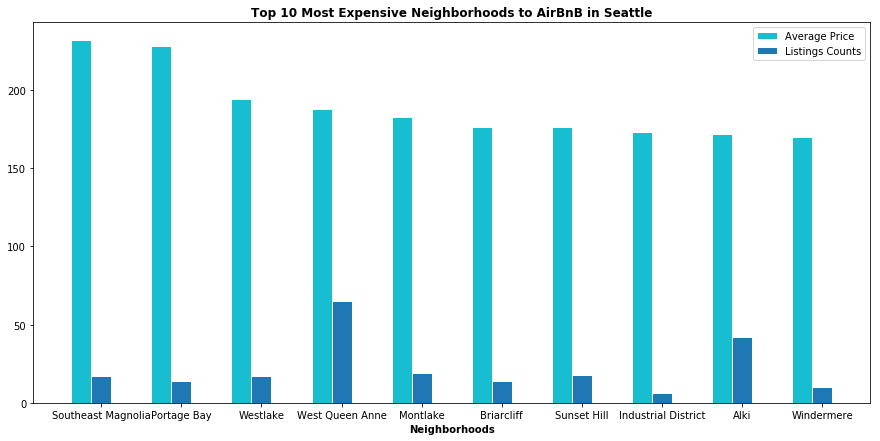

In [35]:
# getting the top 10 highest priced neighborhoods from df_listings_with_neighborhoods
df_highest_priced_neighborhoods = df_listings_with_neighborhoods.sort_values(by = 'average_price', ascending= False ).iloc[0:10]

#set the figure size
plt.figure(figsize=(15,7))

#set the figure bars width
bar_width = 0.25

#set the figure average_price and listings_counts bars positions
average_price_position = np.arange(df_highest_priced_neighborhoods.shape[0])
listings_counts_position = [x + bar_width for x in average_price_position]

# plot the barplot of df_highest_priced_neighborhoods listings counts and average prices
plt.bar(average_price_position, df_highest_priced_neighborhoods.average_price, color=base_color, width=bar_width, edgecolor='white', label='Average Price')
plt.bar(listings_counts_position, df_highest_priced_neighborhoods.listings_counts, color=base_color_2, width=bar_width, edgecolor='white', label='Listings Counts')

#set xticklabels, title and labels of plot
plt.title("Top 10 Most Expensive Neighborhoods to AirBnB in Seattle", fontweight='bold')
plt.xlabel('Neighborhoods', fontweight='bold')
plt.xticks([position + bar_width for position in range(df_highest_priced_neighborhoods.shape[0])], list(df_highest_priced_neighborhoods.neighborhood))
 
#set the legend
plt.legend()

#Show figure
plt.show()


Then, we will take a look at the top the most expensive neighborhoods to AirBnB in Seattle:

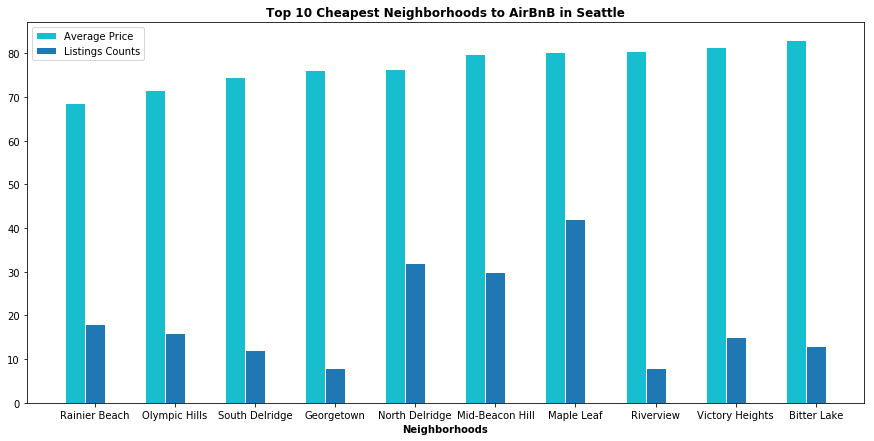

In [36]:
# getting the top 10 lowest priced neighborhoods from df_listings_with_neighborhoods
df_lowest_priced_neighborhoods = df_listings_with_neighborhoods.sort_values(by = 'average_price' ).iloc[0:10]

#set the figure size
plt.figure(figsize=(15,7))

#set the figure bars width
bar_width = 0.25

#set the figure average_price and listings_counts bars positions
average_price_position = np.arange(df_lowest_priced_neighborhoods.shape[0])
listings_counts_position = [x + bar_width for x in average_price_position]

# plot the barplot of df_lowest_priced_neighborhoods listings counts and average prices
plt.bar(average_price_position, df_lowest_priced_neighborhoods.average_price, color=base_color, width=bar_width, edgecolor='white', label='Average Price')
plt.bar(listings_counts_position, df_lowest_priced_neighborhoods.listings_counts, color=base_color_2, width=bar_width, edgecolor='white', label='Listings Counts')

#set yticklabels, title and labels of plot
plt.title("Top 10 Cheapest Neighborhoods to AirBnB in Seattle" , fontweight='bold')
plt.xlabel('Neighborhoods', fontweight='bold')
plt.xticks([position + bar_width for position in range(df_lowest_priced_neighborhoods.shape[0])], list(df_lowest_priced_neighborhoods.neighborhood))
 
#set the legend
plt.legend()

#Show figure
plt.show()


#### 5. Results
You can see from the charts above that: 

The top 3 most expensive neighborhoods to AirBnB in Seattle are:

1. Southeast Magnolia 
2. Portage Bay
3. Westlake


And the top 3 cheapest neighborhoods are:

1. Rainier Beach
2. Olympic Hills
3. South Delridge

You might what to look for listings on these neighborhoods if you looking to travel on a budget.


### 3. Which AirBnB Seattle listings propeitres has the greatest impact on thier prices?

To answer this question were are going to use the listings data set.


In [37]:
# getting the columns names and numbers of listings data set
df_listings.columns, len(df_listings.columns)

(Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
        'space', 'description', 'experiences_offered', 'neighborhood_overview',
        'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
        'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
        'host_location', 'host_about', 'host_response_time',
        'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
        'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
        'host_listings_count', 'host_total_listings_count',
        'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
        'street', 'neighbourhood', 'neighbourhood_cleansed',
        'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
        'smart_location', 'country_code', 'country', 'latitude', 'longitude',
        'is_location_exact', 'property_type', 'room_type', 'accommodates',
        'bathrooms', 'bedrooms', 'beds', 'bed_type', 

#### 3. Data preparation
Before using the dataset to answer the third question, their are some data preparation steps that are needed to be done:

 - Try to reduce the number of colunms by finding the colunms that don't add value.
 - Convert "t" and "f" values in binary colunms to 1 and 0 respectivly.
 - Converting prices columns price, weekly_price, monthly_price, security_deposit, cleaning_fee,  and extra_people from string value to numeric.
 - Converting rate colunms host_response_rate and host_acceptance_rate from from string "##.## %" value to numeric.
 - Handle catagoical columns.
 - Convet security_deposit, cleaning_fee, and extra_people 
 - Filling columns missing values. 





###### - Try to reduce the number of colunms by finding the colunms that don't add value:

- Find columns that have only one value and drop them:

In [38]:
# find columns that have only one value
one_value_colums = list(df_listings.columns[df_listings.nunique() == 1])


print('\nColumns that have only one value: ',one_value_colums)

# drop columns that have only one value
print("\nNumber of colmns before dropping one valued colums: ", df_listings.shape[1])
df_listings.drop(one_value_colums,axis=1, inplace= True)
print("\nNumber of colmns after dropping one valued colums: ", df_listings.shape[1])


Columns that have only one value:  ['scrape_id', 'last_scraped', 'experiences_offered', 'market', 'country_code', 'country', 'has_availability', 'calendar_last_scraped', 'requires_license', 'jurisdiction_names']

Number of colmns before dropping one valued colums:  92

Number of colmns after dropping one valued colums:  82


- Find columns with more that 90% missing values and drop them:

In [39]:
# find columns that have more that 90% missing values 
more_than_90_persent_value_missing_colums = list(set(df_listings.columns[df_listings.isnull().mean() >= .9]))
print('\nColumns with more that 90% missing values: ',more_than_90_persent_value_missing_colums)

# drop columns that have more that 90% missing values
print("\nNumber of colmns before dropping columns with more that 90% missing values: ", df_listings.shape[1])
df_listings.drop(more_than_90_persent_value_missing_colums,axis=1, inplace= True)
print("\nNumber of colmns after dropping columns with more that 90% missing values: ", df_listings.shape[1])


Columns with more that 90% missing values:  ['square_feet', 'license']

Number of colmns before dropping columns with more that 90% missing values:  82

Number of colmns after dropping columns with more that 90% missing values:  80


- Find columns with more than 80% distinct values and drop them (exept for amenities column):

In [40]:
# getting columns with more than 80% distinct values

more_than_80_persent_distinct_values_colunms= []
for col in df_listings.columns:
    if (df_listings[col].nunique()/df_listings[col].count())*100 >= 80:
        more_than_80_persent_distinct_values_colunms.append(col)
        print(col, (df_listings[col].nunique()/df_listings[col].count())*100,"%") 

# remove amenities
more_than_80_persent_distinct_values_colunms.remove('amenities')        
print('\nMore than 80% distinct values colunms: ',more_than_80_persent_distinct_values_colunms)

# drop amenities column
print("\nNumber of colmns before dropping more than 80% distinct values colunms: ", df_listings.shape[1])
df_listings.drop(more_than_80_persent_distinct_values_colunms,axis=1, inplace= True)
print("\nNumber of colmns after dropping more than 80% distinct values colunms: ", df_listings.shape[1])


id 100.0 %
listing_url 100.0 %
name 99.31901519119958 %
summary 95.52320790991486 %
space 95.99876885195445 %
description 98.00942902042954 %
neighborhood_overview 89.9497487437186 %
notes 90.37070524412296 %
transit 89.25104022191401 %
thumbnail_url 100.0 %
medium_url 100.0 %
picture_url 100.0 %
xl_picture_url 100.0 %
latitude 100.0 %
longitude 100.0 %
amenities 86.01361969617601 %

More than 80% distinct values colunms:  ['id', 'listing_url', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'latitude', 'longitude']

Number of colmns before dropping more than 80% distinct values colunms:  80

Number of colmns after dropping more than 80% distinct values colunms:  65


- As we already viewed the realationship between listings price and their neighbourhoods and their values varieties will drop neighbourhood realted columns

In [41]:
# list of neighborhood columns
neighborhood_columns = ['neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','street','zipcode'] 

# drop neighborhood columns
print("\nNumber of colmns before dropping neighbourhood columns: ", df_listings.shape[1])
df_listings.drop(neighborhood_columns ,axis=1, inplace= True)
print("\nNumber of colmns after dropping neighbourhood columns: ", df_listings.shape[1])




Number of colmns before dropping neighbourhood columns:  65

Number of colmns after dropping neighbourhood columns:  60


- As the colunms smart_location, state, city refer to the same value will drop these colunms. 

In [42]:
# list same location columns
same_location_columns = ['smart_location', 'state', 'city']

# drop same_location_columns
print("\nNumber of colmns before dropping same location columns: ", df_listings.shape[1])
df_listings.drop(same_location_columns ,axis=1, inplace= True)
print("\nNumber of colmns after dropping same location columns ", df_listings.shape[1])



Number of colmns before dropping same location columns:  60

Number of colmns after dropping same location columns  57


- Now we will remove any host columns that will not add a lot of information :  host_url, host_name, host_since, host_location, host_about , host_verifications, host_thumbnail_url, host_picture_url, and host_neighbourhood. Also, remove weekly_price and monthly_price as we are try to find the impact on price column


In [43]:
#list of usless host coulums and weekly_price and monthly_price 
host_colunms = ['monthly_price','weekly_price', 'host_id', 'host_has_profile_pic', 'host_url', 'host_name', 'host_since','host_listings_count','host_response_time', 'host_location', 'host_about','host_verifications','host_thumbnail_url', 'host_picture_url','host_neighbourhood']

# drop usless host coulums 
print("\nNumber of colmns before dropping columns that will not add a lot of information: ", df_listings.shape[1])
df_listings.drop(host_colunms ,axis=1, inplace= True)
print("\nNumber of colmns after dropping columns that will not add a lot of information: ", df_listings.shape[1])



Number of colmns before dropping columns that will not add a lot of information:  57

Number of colmns after dropping columns that will not add a lot of information:  42


In [44]:
 len(list(set(df_listings.columns[df_listings.isnull().mean() != 0])))

21

In [45]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 42 columns):
host_response_rate                  3295 non-null object
host_acceptance_rate                3045 non-null object
host_is_superhost                   3816 non-null object
host_total_listings_count           3816 non-null float64
host_identity_verified              3816 non-null object
is_location_exact                   3818 non-null object
property_type                       3817 non-null object
room_type                           3818 non-null object
accommodates                        3818 non-null int64
bathrooms                           3802 non-null float64
bedrooms                            3812 non-null float64
beds                                3817 non-null float64
bed_type                            3818 non-null object
amenities                           3818 non-null object
price                               3818 non-null object
security_deposit                   

##### - Convert "t" and "f" values in binary colunms to 1 and 0 respectivly:

In [46]:
# getting binary columns with 't' and 'f'
bool_cols = [col for col in df_listings if np.isin(df_listings[col].dropna().unique(), ['t', 'f']).all()]
print("Binary columns are:" , bool_cols )

# convert "t" and "f" values in binary colunms to 1 and 0 respectivly
for col in bool_cols:
    df_listings[col] = df_listings.apply(lambda x: 1 if( x[col]=='t') else 0 ,axis=1)
    
df_listings.info()

Binary columns are: ['host_is_superhost', 'host_identity_verified', 'is_location_exact', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']


/Users/NYRoomi/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 42 columns):
host_response_rate                  3295 non-null object
host_acceptance_rate                3045 non-null object
host_is_superhost                   3818 non-null int64
host_total_listings_count           3816 non-null float64
host_identity_verified              3818 non-null int64
is_location_exact                   3818 non-null int64
property_type                       3817 non-null object
room_type                           3818 non-null object
accommodates                        3818 non-null int64
bathrooms                           3802 non-null float64
bedrooms                            3812 non-null float64
beds                                3817 non-null float64
bed_type                            3818 non-null object
amenities                           3818 non-null object
price                               3818 non-null object
security_deposit                    18

##### - Converting prices columns price, weekly_price, monthly_price, security_deposit, cleaning_fee, and extra_people from string value to numeric:

In [47]:
# list of prices columns
price_columns = ['price', 'security_deposit', 'cleaning_fee', 'extra_people']

#convert vlaues to numeric
for col in price_columns:
    df_listings[col] = df_listings.apply(lambda x: float(x[col].replace('$', '').replace(',', '')) if( pd.notna(x[col])) else x[col] ,axis=1)

df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 42 columns):
host_response_rate                  3295 non-null object
host_acceptance_rate                3045 non-null object
host_is_superhost                   3818 non-null int64
host_total_listings_count           3816 non-null float64
host_identity_verified              3818 non-null int64
is_location_exact                   3818 non-null int64
property_type                       3817 non-null object
room_type                           3818 non-null object
accommodates                        3818 non-null int64
bathrooms                           3802 non-null float64
bedrooms                            3812 non-null float64
beds                                3817 non-null float64
bed_type                            3818 non-null object
amenities                           3818 non-null object
price                               3818 non-null float64
security_deposit                    1

##### - Converting rate colunms host_response_rate and host_acceptance_rate from from string "##.## %" value to numeric:




In [48]:
# list of rate columns
rate_columns = ['host_response_rate', 'host_acceptance_rate']

#convert vlaues to numeric
for col in rate_columns:
    df_listings[col] = df_listings.apply(lambda x: float(x[col].replace('%', '')) if( pd.notna(x[col])) else x[col] ,axis=1)

df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 42 columns):
host_response_rate                  3295 non-null float64
host_acceptance_rate                3045 non-null float64
host_is_superhost                   3818 non-null int64
host_total_listings_count           3816 non-null float64
host_identity_verified              3818 non-null int64
is_location_exact                   3818 non-null int64
property_type                       3817 non-null object
room_type                           3818 non-null object
accommodates                        3818 non-null int64
bathrooms                           3802 non-null float64
bedrooms                            3812 non-null float64
beds                                3817 non-null float64
bed_type                            3818 non-null object
amenities                           3818 non-null object
price                               3818 non-null float64
security_deposit                   

##### - Handle catagoical columns:




let's see the catagoical columns:

In [49]:
#getting info of catagoical columns
df_listings.select_dtypes(include=['object']).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 8 columns):
property_type          3817 non-null object
room_type              3818 non-null object
bed_type               3818 non-null object
amenities              3818 non-null object
calendar_updated       3818 non-null object
first_review           3191 non-null object
last_review            3191 non-null object
cancellation_policy    3818 non-null object
dtypes: object(8)
memory usage: 238.7+ KB


- Let's handle bed_type column:
        let's see the value counts of bed_type

In [50]:
# getting bed_type values count
df_listings.bed_type.value_counts()

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64

    As the majority of listings has Real Bed  as  their bed_type will convert the column to a binary value has has_real_bed column

In [51]:
# convert bed_type to has_bed binary column 
def set_has_bed(bed_type):
        return 1 if (bed_type == 'Real Bed') else 0

# create new column with new has_real_bed values
df_listings['has_real_bed'] = df_listings.bed_type.map(set_has_bed)

#drop bed_type column 
print("\nNumber of colmns before dropping bed_type colunm: ", df_listings.shape[1])
df_listings.drop('bed_type',axis=1, inplace= True)
print("\nNumber of colmns after dropping bed_type colunm: ", df_listings.shape[1])


Number of colmns before dropping bed_type colunm:  43

Number of colmns after dropping bed_type colunm:  42


- Let's handle amenities column:
        let's see the value counts of amenities

In [52]:
# getting bed_type values count
df_listings.amenities.value_counts()

{}                                                                                                                                                                                                                                                                                                                                                                                                                    45
{Internet,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer}                                                                                                                                                                                                                                                                                                                                11
{TV,"Cable TV",Internet,"Wireless Internet",Pool,Kitchen,"Free Parking on Premises",Gym,"Elevator in Building","Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","

    As amenities column has is a multi valued colunms will convert it to a multiple binary columns that rupresnt if the listing has the this amenity. 
    
    First will extract the unique amenities listings values

In [53]:
# defining the list that will contain unique amenities listings values
amenities_values = []

# the funstion the will handle extracting amenities values
def extract_amenities_values(amenity):
    amenities = amenity.replace('{','').replace('}','').replace('"','').split(',')
    for amen in amenities:
        if amen not in amenities_values:
            amenities_values.append(amen) 

# applying extract_amenities_values on amenities column           
df_listings.amenities.map(extract_amenities_values)
print("The unique amenities listings values are: \n", amenities_values)

The unique amenities listings values are: 
 ['TV', 'Cable TV', 'Internet', 'Wireless Internet', 'Air Conditioning', 'Kitchen', 'Heating', 'Family/Kid Friendly', 'Washer', 'Dryer', 'Free Parking on Premises', 'Buzzer/Wireless Intercom', 'Smoke Detector', 'Carbon Monoxide Detector', 'First Aid Kit', 'Safety Card', 'Fire Extinguisher', 'Essentials', 'Pets Allowed', 'Pets live on this property', 'Dog(s)', 'Cat(s)', 'Hot Tub', 'Indoor Fireplace', 'Shampoo', 'Breakfast', '24-Hour Check-in', 'Hangers', 'Hair Dryer', 'Iron', 'Laptop Friendly Workspace', 'Suitable for Events', 'Elevator in Building', 'Lock on Bedroom Door', 'Wheelchair Accessible', 'Gym', '', 'Pool', 'Smoking Allowed', 'Other pet(s)', 'Doorman', 'Washer / Dryer']


    Now we will group related amenities, collect the values for each row and add the columns to df_listings

In [54]:
# grouping related amenities values 
amenities_keywords = {'TV': ['TV'],
 'Internet': ['Internet'],
 'Air_Conditioning': ['Air Conditioning'],
 'Kitchen': ['Kitchen'],
 'Heating': ['Heating'],
 'Family_Kid_Friendly': ['Family/Kid Friendly'],
 'Washer': ['Washer'],
 'Dryer': ['Dryer'],
 'Free_Parking_on_Premises': ['Free Parking on Premises'],
 'Buzzer_Wireless_Intercom': ['Buzzer/Wireless Intercom'],
 'Smoke_Detector': ['Smoke Detector'],
 'Carbon_Monoxide_Detector': ['Carbon Monoxide Detector'],
 'First_Aid_Kit': ['First Aid Kit'],
 'Safety_Card': ['Safety Card'],
 'Fire_Extinguisher': ['Fire Extinguisher'],
 'Essentials': ['Essentials'],
 'Pets_Allowed': ['Pets','Dog(s)','pets','Cat(s)'],
 'Hot_Tub': ['Hot Tub'],
 'Indoor_Fireplace': ['Indoor Fireplace'],
 'Shampoo': ['Shampoo'],
 'Breakfast': ['Breakfast'],
 '24_Hour_Check_in': ['24-Hour Check-in'],
 'Hangers': ['Hangers'],
 'Hair_Dryer': ['Hair Dryer'],
 'Iron': ['Iron'],
 'Laptop_Friendly_Workspace': ['Laptop Friendly Workspace'],
 'Suitable_for_Events': ['Suitable for Events'],
 'Elevator_in_Building': ['Elevator in Building'],
 'Lock_on_Bedroom_Door': ['Lock on Bedroom Door'],
 'Wheelchair_Accessible': ['Wheelchair Accessible'],
 'Gym': ['Gym'],
 'Pool': ['Pool'],
 'Smoking_Allowed': ['Smoking Allowed'],
 'Doorman': ['Doorman']}

# to get the flags value of diffrent amenities of an AirBnB listings
amenities_values = {'TV': [],
 'Internet': [],
 'Air_Conditioning': [],
 'Kitchen': [],
 'Heating': [],
 'Family_Kid_Friendly': [],
 'Washer': [],
 'Dryer': [],
 'Free_Parking_on_Premises': [],
 'Buzzer_Wireless_Intercom': [],
 'Smoke_Detector': [],
 'Carbon_Monoxide_Detector': [],
 'First_Aid_Kit': [],
 'Safety_Card': [],
 'Fire_Extinguisher': [],
 'Essentials': [],
 'Pets_Allowed': [],
 'Hot_Tub': [],
 'Indoor_Fireplace': [],
 'Shampoo': [],
 'Breakfast': [],
 '24_Hour_Check_in': [],
 'Hangers': [],
 'Hair_Dryer': [],
 'Iron': [],
 'Laptop_Friendly_Workspace': [],
 'Suitable_for_Events': [],
 'Elevator_in_Building': [],
 'Lock_on_Bedroom_Door': [],
 'Wheelchair_Accessible': [],
 'Gym': [],
 'Pool': [],
 'Smoking_Allowed': [],
 'Doorman': []}

# define a fuction to get the flags value of diffrent amenities of an AirBnB listings
def get_amenities_colunms_values(amenity):
    for amenities in amenities_keywords.keys():
        for keyword in  amenities_keywords[amenities]:
            if keyword in amenity:
                flag = 1
                break
            else:
                flag = 0
        amenities_values[amenities].append(flag)
        
# apply funtion on amenities column        
x = df_listings.amenities.map(get_amenities_colunms_values)

# add amenities_values as columns to df_listings
for amenity in amenities_values.keys():
    df_listings[amenity] = amenities_values[amenity]
    
# drop amenities column
print("\nNumber of colmns before dropping amenities colum: ", df_listings.shape[1])
df_listings.drop('amenities',axis=1, inplace= True)
print("\nNumber of colmns after dropping amenities colum: ", df_listings.shape[1])


Number of colmns before dropping amenities colum:  76

Number of colmns after dropping amenities colum:  75


In [55]:
['property_type',
 'room_type',
 'calendar_updated',
 'first_review',
 'last_review',
 'cancellation_policy']

['property_type',
 'room_type',
 'calendar_updated',
 'first_review',
 'last_review',
 'cancellation_policy']

- Let's handle property_type column:
        let's see the value counts of property_type

In [56]:
df_listings.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

     Form what we can see above we can convert values less popular (with count 13 and below) property types to 
     Other.

In [57]:
# list roperty_type values that will be  converted to Other
converted_to_other_property_type = ['Camper/RV','Bungalow','Boat','Tent','Treehouse','Dorm', 'Chalet','Yurt']

#  
def converte_to_other_property_type(property_type):
        return 'Other' if (property_type in converted_to_other_property_type ) else property_type 

# create new column with new has_real_bed values
df_listings['property_type'] = df_listings.property_type.map(converte_to_other_property_type)

# display property_type value counts after conversion
df_listings.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Other                69
Loft                 40
Bed & Breakfast      37
Cabin                21
Name: property_type, dtype: int64

    Now we can use get_dummies to convert the property_type into multipule binary colunms of property_type values

In [58]:

# convert the room_type into multipule binary colunms of room_type values and add them to df_listings 
# with dropping room_type
print("\nNumber of colmns before dropping property_type column: ", df_listings.shape[1])
df_listings = pd.concat([df_listings.drop('property_type',axis=1 ), pd.get_dummies(df_listings.property_type, prefix = "property_type", prefix_sep="_" )],axis=1)
print("\nNumber of colmns after dropping property_type column: ", df_listings.shape[1])

df_listings.info()



Number of colmns before dropping property_type column:  75

Number of colmns after dropping property_type column:  82
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 82 columns):
host_response_rate                  3295 non-null float64
host_acceptance_rate                3045 non-null float64
host_is_superhost                   3818 non-null int64
host_total_listings_count           3816 non-null float64
host_identity_verified              3818 non-null int64
is_location_exact                   3818 non-null int64
room_type                           3818 non-null object
accommodates                        3818 non-null int64
bathrooms                           3802 non-null float64
bedrooms                            3812 non-null float64
beds                                3817 non-null float64
price                               3818 non-null float64
security_deposit                    1866 non-null float64
cleaning_fee                 

- Let's handle room_type column:
        let's see the value counts of room_type

In [59]:
df_listings.room_type.value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

    Now we can use get_dummies to convert the room_type into multipule binary colunms of room_type values

In [60]:

# convert the room_type into multipule binary colunms of room_type values and add them to df_listings 
# with dropping room_type
print("\nNumber of colmns before dropping room_type column: ", df_listings.shape[1])
df_listings =  pd.concat([df_listings.drop('room_type',axis=1 ), pd.get_dummies(df_listings.room_type, prefix = "room_type", prefix_sep="_" )],axis=1)
print("\nNumber of colmns after dropping room_type column: ", df_listings.shape[1])

df_listings.info()



Number of colmns before dropping room_type column:  82

Number of colmns after dropping room_type column:  84
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 84 columns):
host_response_rate                  3295 non-null float64
host_acceptance_rate                3045 non-null float64
host_is_superhost                   3818 non-null int64
host_total_listings_count           3816 non-null float64
host_identity_verified              3818 non-null int64
is_location_exact                   3818 non-null int64
accommodates                        3818 non-null int64
bathrooms                           3802 non-null float64
bedrooms                            3812 non-null float64
beds                                3817 non-null float64
price                               3818 non-null float64
security_deposit                    1866 non-null float64
cleaning_fee                        2788 non-null float64
guests_included                     

- Let's handle cancellation_policy column:
        let's see the value counts of cancellation_policy

In [61]:
df_listings.cancellation_policy.value_counts()

strict      1417
moderate    1251
flexible    1150
Name: cancellation_policy, dtype: int64

    - Now we can use get_dummies to convert the cancellation_policy into multipule binary colunms of 
    cancellation_policy values

In [62]:

# convert the cancellation_policy into multipule binary colunms of property_type values and add them to df_listings 
# with dropping cancellation_policy
print("\nNumber of colmns before dropping cancellation_policy column: ", df_listings.shape[1])
df_listings =  pd.concat([df_listings.drop('cancellation_policy',axis=1  ), pd.get_dummies(df_listings.cancellation_policy, prefix = "cancellation_policy", prefix_sep="_" )],axis=1)
print("\nNumber of colmns after dropping cancellation_policy column: ", df_listings.shape[1])

df_listings.info()



Number of colmns before dropping cancellation_policy column:  84

Number of colmns after dropping cancellation_policy column:  86
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 86 columns):
host_response_rate                  3295 non-null float64
host_acceptance_rate                3045 non-null float64
host_is_superhost                   3818 non-null int64
host_total_listings_count           3816 non-null float64
host_identity_verified              3818 non-null int64
is_location_exact                   3818 non-null int64
accommodates                        3818 non-null int64
bathrooms                           3802 non-null float64
bedrooms                            3812 non-null float64
beds                                3817 non-null float64
price                               3818 non-null float64
security_deposit                    1866 non-null float64
cleaning_fee                        2788 non-null float64
guests_included 

- Let's handle calendar_updated column:
    
        let's see the value counts of calendar_updated

In [63]:
df_listings.calendar_updated.value_counts()

today            706
2 weeks ago      347
3 weeks ago      300
2 months ago     281
a week ago       248
yesterday        231
3 months ago     218
4 weeks ago      213
3 days ago       162
5 weeks ago      156
4 days ago       145
4 months ago     133
5 days ago       132
6 weeks ago      118
2 days ago        96
5 months ago      91
7 weeks ago       63
6 months ago      29
6 days ago        28
1 week ago        26
never             24
7 months ago      23
8 months ago      14
10 months ago      8
9 months ago       7
11 months ago      5
12 months ago      5
22 months ago      2
13 months ago      2
17 months ago      1
16 months ago      1
14 months ago      1
15 months ago      1
30 months ago      1
Name: calendar_updated, dtype: int64

    - After looking at the the calendar_updated column, we can generalize the vlaues as a binary value and assign 1 
    to the rows where calendar_updated values that are 6 months or less 

In [64]:
# list of calendar_updated in 6 months values
calendar_updated_in_6_month_values = ['today','yesterday','2 days ago','3 days ago','4 days ago','5 days ago','6 days ago','a week ago','1 week ago','2 weeks ago','3 weeks ago','4 weeks ago','5 weeks ago','6 weeks ago','7 weeks ago','2 months ago','3 months ago','4 months ago','5 months ago','6 months ago']


# convert bed_type to has_bed binary column 
def set_calendar_updated_in_6_month(calendar_updated):
        return 1 if (calendar_updated in calendar_updated_in_6_month_values ) else 0

# create new column with new has_real_bed values
df_listings['calendar_updated_in_6_month'] = df_listings.calendar_updated.map(set_calendar_updated_in_6_month)

#drop bed_type column 
print("\nNumber of colmns before dropping calendar_updated colunm: ", df_listings.shape[1])
df_listings.drop('calendar_updated',axis=1, inplace= True)
print("\nNumber of colmns after dropping calendar_updated colunm: ", df_listings.shape[1])


df_listings.info()


Number of colmns before dropping calendar_updated colunm:  87

Number of colmns after dropping calendar_updated colunm:  86
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 86 columns):
host_response_rate                  3295 non-null float64
host_acceptance_rate                3045 non-null float64
host_is_superhost                   3818 non-null int64
host_total_listings_count           3816 non-null float64
host_identity_verified              3818 non-null int64
is_location_exact                   3818 non-null int64
accommodates                        3818 non-null int64
bathrooms                           3802 non-null float64
bedrooms                            3812 non-null float64
beds                                3817 non-null float64
price                               3818 non-null float64
security_deposit                    1866 non-null float64
cleaning_fee                        2788 non-null float64
guests_included       

- Let's handle first_review and last_review columns:
    
        let's see the value counts of first_review and last_review

In [65]:
# value counts of first_review
df_listings.first_review.value_counts()

2015-09-21    25
2015-12-01    22
2015-07-27    22
2015-06-14    21
2015-08-23    20
2015-11-29    20
2015-08-31    20
2015-08-30    19
2015-09-07    19
2015-08-16    19
2015-08-03    18
2015-08-10    17
2015-08-07    17
2015-06-15    17
2015-09-27    16
2015-05-25    15
2015-07-26    15
2015-07-06    15
2015-08-08    14
2015-06-21    14
2015-03-29    14
2015-09-28    14
2014-07-22    14
2015-05-19    14
2015-12-14    13
2015-10-19    13
2015-07-12    13
2015-08-09    13
2015-11-16    13
2015-07-20    13
              ..
2014-10-10     1
2015-04-10     1
2010-08-02     1
2015-03-20     1
2012-02-28     1
2015-03-04     1
2013-07-29     1
2010-12-24     1
2014-11-21     1
2015-03-11     1
2011-01-18     1
2013-07-04     1
2013-10-30     1
2011-11-01     1
2013-03-26     1
2015-01-27     1
2015-12-03     1
2013-01-25     1
2013-08-02     1
2011-04-20     1
2015-04-23     1
2010-09-01     1
2012-05-04     1
2012-10-21     1
2014-11-22     1
2012-09-24     1
2014-07-31     1
2012-05-15    

In [66]:
# value counts of last_review
df_listings.last_review.value_counts()

2016-01-02    94
2015-12-01    90
2015-11-29    90
2016-01-01    87
2015-12-30    77
2015-12-20    76
2015-12-29    75
2015-12-28    61
2015-12-31    58
2015-12-21    55
2015-12-14    52
2015-12-22    52
2015-12-27    51
2015-12-13    45
2015-12-26    45
2015-10-19    42
2015-12-23    42
2015-11-28    39
2015-12-06    38
2016-01-03    36
2015-12-24    34
2015-09-28    33
2015-12-16    32
2015-12-18    32
2015-12-19    32
2015-12-15    31
2015-11-25    31
2015-09-01    30
2015-12-12    30
2015-11-23    29
              ..
2015-07-11     1
2015-03-23     1
2013-10-17     1
2013-08-19     1
2014-10-18     1
2014-09-03     1
2015-03-29     1
2015-04-13     1
2015-07-24     1
2015-07-04     1
2015-03-05     1
2015-07-03     1
2014-07-10     1
2015-04-23     1
2015-06-25     1
2015-04-10     1
2015-04-12     1
2014-09-30     1
2014-08-09     1
2015-02-12     1
2015-02-03     1
2014-10-13     1
2014-12-22     1
2014-03-04     1
2015-07-08     1
2015-05-27     1
2015-05-23     1
2015-06-01    

        - To reduce the first_review and last_review columns value variablity we can remove the day and month from 
        the dates values

In [67]:
# funtion to remove the day and month from the dates values
def remove_day_and_month(date):
    if pd.notna(date ):
        return int(datetime.strptime(date, '%Y-%m-%d').year)
    else:
        return -1

# apply  remove_day_and_month funtion on first_review and last_review columns   
for col in ['first_review','last_review']:
    df_listings[col] = df_listings[col].map(remove_day_and_month)


df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 86 columns):
host_response_rate                  3295 non-null float64
host_acceptance_rate                3045 non-null float64
host_is_superhost                   3818 non-null int64
host_total_listings_count           3816 non-null float64
host_identity_verified              3818 non-null int64
is_location_exact                   3818 non-null int64
accommodates                        3818 non-null int64
bathrooms                           3802 non-null float64
bedrooms                            3812 non-null float64
beds                                3817 non-null float64
price                               3818 non-null float64
security_deposit                    1866 non-null float64
cleaning_fee                        2788 non-null float64
guests_included                     3818 non-null int64
extra_people                        3818 non-null float64
minimum_nights                   

##### Filling columns missing values:
    
    lets take at columns with missing values and the counts of these missing values
    

In [68]:
# list that will store name of columns with missing values
columns_with_missing_data = []

# display columns with missing values and the counts of these missing values
for col in df_listings.columns:
    if df_listings[col].isnull().mean() > 0:
        columns_with_missing_data.append(col)
        print(col,df_listings[col].isnull().sum())
        
print( '\nColumns with missing values are: \n', columns_with_missing_data)
        

host_response_rate 523
host_acceptance_rate 773
host_total_listings_count 2
bathrooms 16
bedrooms 6
beds 1
security_deposit 1952
cleaning_fee 1030
review_scores_rating 647
review_scores_accuracy 658
review_scores_cleanliness 653
review_scores_checkin 658
review_scores_communication 651
review_scores_location 655
review_scores_value 656
reviews_per_month 627

Columns with missing values are: 
 ['host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']


    - we will replace missing values with -1.

In [69]:
# replace missing value with -1.
print("\nNumber of colunms with missing values before filling with -1 : ",len(list(df_listings.columns[df_listings.isnull().mean() > 0])))
df_listings = df_listings.fillna(-1)
print("\nNumber of colunms with missing values after filling with -1 : ",len(list(df_listings.columns[df_listings.isnull().mean() > 0])))



Number of colunms with missing values before filling with -1 :  16

Number of colunms with missing values after filling with -1 :  0


#### 4. Data Model (Analysis)


Here we try to answer our question from the prepared data:

3. Which AirBnB Seattle listings propeitres has the greatest impact on thier prices?

First, we will the correlation between the price and other columns:

In [70]:
# getting the corralation matrix
corr = df_listings.corr()
# getting the corralation beween price other columns
corr.price.sort_values()

# define the data frame with colum corralation value and abslute value of corralation
df_price_corr = pd.DataFrame({'column':corr.index,'Corr':corr.price})
df_price_corr['abs_Corr'] =  df_price_corr.apply(lambda x: abs(x['Corr']) ,axis=1)
df_price_corr = df_price_corr[df_price_corr['column'] != 'price']

# sort by abslute value of corralation


''

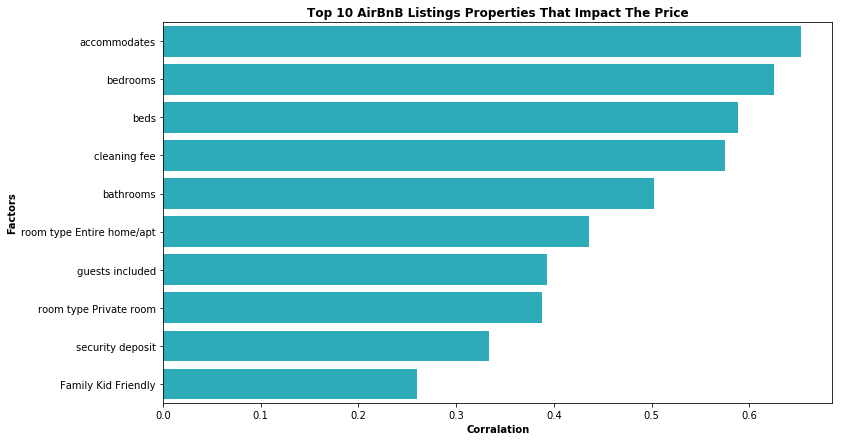

In [71]:
#set the figure size
plt.figure(figsize=(12,7))

# sort by abslute value of corralation and get top 10
top_five_price_high_impact_factors = df_price_corr.sort_values(by='abs_Corr', ascending= False).reset_index()[:10]

# plot the barplot of booked_listings_counts_by_month counts
plot = sb.barplot(y = top_five_price_high_impact_factors.column, x =top_five_price_high_impact_factors.abs_Corr, color = base_color);

#set xticklabels, title and labels of plot
plt.xlabel('Corralation', fontweight='bold')
plt.ylabel('Factors', fontweight='bold') 
plt.title('Top 10 AirBnB Listings Properties That Impact The Price', fontweight='bold')
plot.set_yticklabels([ col.replace('_',' ') for col in top_five_price_high_impact_factors.column ])
;

#### Results:

You can see from the chart above that the most influential listings properties on their prices are how many people the listings accommodates followed by the number of bedrooms and beds.

So unless you're planning to travel with a large party, don't look for listings that accommodate a large number of people or it going to come out of your budget.